In [98]:
import pandas as pd
from glob import glob

In [99]:
# df1 = pd.concat( [
#     pd.read_csv(
#         "data/bigdata/tpss_bcycl_od_statnhm_202201/tpss_bcycl_od_statnhm_20220101.csv", 
#         encoding="cp949",
#     ),
#     pd.read_csv(
#         "data/bigdata/tpss_bcycl_od_statnhm_202201/tpss_bcycl_od_statnhm_20220102.csv", 
#         encoding="cp949",
#     ),
# ] ) # 토일

df1 = pd.concat( [
    pd.read_csv(
        "data/bigdata/tpss_bcycl_od_statnhm_202201/tpss_bcycl_od_statnhm_20220103.csv", 
        encoding="cp949",
    ),
    pd.read_csv(
        "data/bigdata/tpss_bcycl_od_statnhm_202201/tpss_bcycl_od_statnhm_20220104.csv", 
        encoding="cp949",
    ),
] ) #월화




"""_summary_
1. 개별 이용 사례들에 관한 데이터
2. 시작_대여소부터 종료대여소까지의 자세한 정보가 나와있음.
"""

'_summary_\n1. 개별 이용 사례들에 관한 데이터\n2. 시작_대여소부터 종료대여소까지의 자세한 정보가 나와있음.\n'

In [100]:
df1.sort_values("전체_이용_거리", ascending=False)

,기준_날짜,기준_시간대,시작_대여소_ID,종료_대여소_ID,전체_건수,전체_이용_분,전체_이용_거리
98159,20220103,2115,ST-1938,ST-1142,1,8,458358
96809,20220103,2105,ST-1938,ST-1142,1,8,458358
34771,20220103,1220,ST-1298,ST-1298,3,414,58959
25784,20220103,1005,ST-1298,ST-1298,3,414,58959
31421,20220104,1025,ST-2115,ST-700,1,93,54470
...,...,...,...,...,...,...,...
80172,20220103,1850,ST-1699,ST-1699,1,0,0
80168,20220103,1850,ST-1688,ST-2550,1,22,0
80167,20220103,1850,ST-1688,ST-2048,1,5,0
64273,20220104,1650,ST-2093,ST-2088,1,16,0


* 전체_이용_거리가 95퍼센타일을 초과하는 데이터들을 거르려고 합니다.
* 비정상적으로 긴 이용거리는 개인적으로 자전거가 회수처리가 되지 않은 상태에서 운반되었던 게 아닌가 싶습니다.

In [101]:
i = df1["전체_이용_거리"] < df1["전체_이용_거리"].quantile(q=0.95) 
df1 = df1[i]
del i

* 또한 전체 이용 시간이 3시간을 초과하는 데이터들도 정리하려고 합니다.

In [102]:
i = df1["전체_이용_분"] < 180
df1 = df1[i]
del i

In [103]:
df1 = df1.reset_index()
df1

,index,기준_날짜,기준_시간대,시작_대여소_ID,종료_대여소_ID,전체_건수,전체_이용_분,전체_이용_거리
0,0,20220103,0,ST-1061,ST-2862,1,20,0
1,1,20220103,0,ST-1065,ST-1254,1,13,0
2,2,20220103,0,ST-1092,ST-502,1,7,1140
3,3,20220103,0,ST-1178,ST-813,1,12,2200
4,4,20220103,0,ST-1195,ST-2420,1,13,2243
...,...,...,...,...,...,...,...,...
208228,112383,20220104,2355,ST-777,ST-1171,1,3,684
208229,112386,20220104,2355,ST-842,ST-156,1,4,610
208230,112387,20220104,2355,ST-86,ST-461,1,26,4946
208231,112388,20220104,2355,ST-89,ST-350,1,10,985


<AxesSubplot:ylabel='Frequency'>

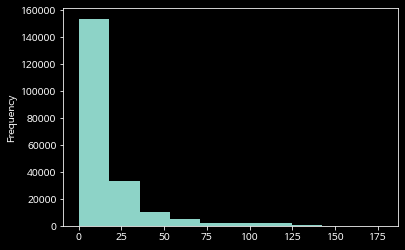

In [104]:
df1["전체_이용_분"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

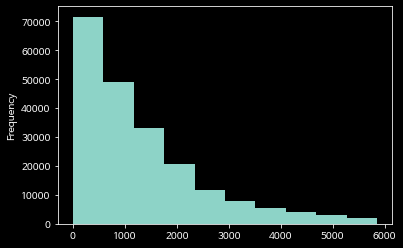

In [105]:
df1["전체_이용_거리"].plot.hist()

## 2. 고도와의 관계 분석

In [106]:
df2 = pd.read_csv("data/대여소별-고도데이터/서울시_따릉이대여소별_고도데이터.csv")\
    .merge(
        right=df1["시작_대여소_ID"].value_counts().to_frame().reset_index(),
        how="left",
        left_on="대여소_ID",
        right_on="index"
    )\
    .merge(
        right=df1["종료_대여소_ID"].value_counts().to_frame().reset_index(),
        how="left",
        left_on="대여소_ID",
        right_on="index"
    )\
    .drop(
        ["index_x", "index_y"], 
        axis=1
    )\
    .rename(columns={
        "시작_대여소_ID": "출발자전거수",
        "종료_대여소_ID": "도착자전거수"
    })
df2 = df2[df2["위도"]>0].reset_index(drop=True)

In [107]:
temp = df2[["dem", "출발자전거수", "도착자전거수"]].dropna()
temp = temp.sort_values("dem")
temp

,dem,출발자전거수,도착자전거수
525,4.99,76.0,96.0
2324,5.19,824.0,816.0
23,5.81,385.0,388.0
1957,6.44,314.0,352.0
480,6.59,337.0,372.0
...,...,...,...
1804,97.49,6.0,2.0
2204,98.46,24.0,10.0
1810,102.01,18.0,4.0
2205,105.26,12.0,8.0


In [108]:
import matplotlib.pyplot as plt
plt.rc("font", family="NanumBarunGothic")
plt.style.use("dark_background")

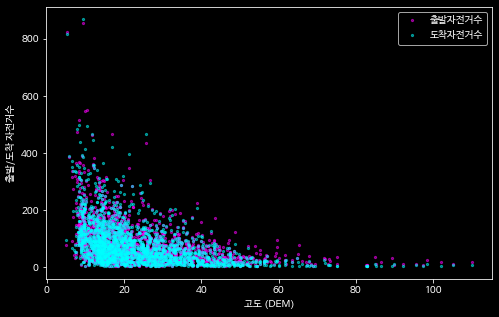

In [109]:
fig, ax = plt.subplots(figsize=(8,5,))

ax.scatter(temp.dem, temp["출발자전거수"], s=5, color="magenta", alpha=0.5)
ax.scatter(temp.dem, temp["도착자전거수"], s=5, color="cyan", alpha=0.5)
ax.set_xlabel("고도 (DEM)")
ax.set_ylabel("출발/도착 자전거수")
ax.legend(["출발자전거수", "도착자전거수"])
plt.show()

In [110]:
temp.corr()

,dem,출발자전거수,도착자전거수
dem,1.000000,-0.377412,-0.421176
출발자전거수,-0.377412,1.000000,0.973240
도착자전거수,-0.421176,0.973240,1.000000


In [111]:
del temp

## Graph로 표현해보기

In [112]:
df2["자치구"] = df2["주소1"].map(lambda x: x.split(" ")[1] if type(x) == str else x)
df2["자치구"] = df2["자치구"].str.replace("월드컵로5길", "마포구").replace("상암동", "마포구")
df2 = df2[df2["자치구"] != "성남시"]


In [113]:
temp = df1[["시작_대여소_ID", "종료_대여소_ID"]]
temp["const"] = 1
temp = temp\
    .merge(df2[["대여소_ID", "자치구"]], how="left", left_on="시작_대여소_ID", right_on="대여소_ID")\
    .merge(df2[["대여소_ID", "자치구"]], how="left", left_on="종료_대여소_ID", right_on="대여소_ID")\
    .drop(["대여소_ID_x", "대여소_ID_y"], axis=1)\
    .rename(columns={"자치구_x": "출발자치구", "자치구_y": "도착자치구"})
temp = temp.groupby(["출발자치구", "도착자치구"]).sum()
temp = temp.reset_index()


/tmp/ipykernel_15256/4003984347.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["const"] = 1


In [114]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np


In [115]:
scaler = MinMaxScaler()
crs_by_gu = df2.groupby("자치구").quantile(0.5)[["위도", "경도"]]
crs_by_gu[["위도", "경도"]] = scaler.fit_transform(crs_by_gu)


/tmp/ipykernel_15256/2636310729.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  crs_by_gu = df2.groupby("자치구").quantile(0.5)[["위도", "경도"]]


In [116]:
crs_by_gu

,위도,경도
자치구,,
강남구,0.181792,0.708889
강동구,0.448117,1.000000
강북구,0.883303,0.617921
강서구,0.501816,0.000000
관악구,0.089177,0.334079
광진구,0.422195,0.793217
구로구,0.159657,0.063110
금천구,0.000000,0.195217
노원구,0.927902,0.747151


In [117]:
temp2 = temp[temp["출발자치구"] != temp["도착자치구"]]
MAX_VAL: int = temp2.const.max()
del temp2

def colorfn(val: float, alpha=1.0): 

    r, g, b, a = plt.colormaps["Blues"]( 1 -  (val + 100)/ (MAX_VAL+150))
    return f"rgba({r*255},{g*255},{b*255},{alpha})"

In [118]:
from pyvis.network import Network
net = Network(
    height="1000px", width="100%", bgcolor="black", font_color="white", directed=True,
    # select_menu=True, 
    # filter_menu=True, 
    layout=None, heading='', cdn_resources='local'
)
# net.repulsion(node_distance=100, spring_length=200)

# net.barnes_hut()
# net.show_buttons(filter_=[
#     # 'nodes', 
#     'edges', 
#     # 'physics',
# ])

for gu in temp["출발자치구"].unique():    
    size = temp[temp.출발자치구 == gu].const.sum()
    net.add_node(
        n_id=gu, 
        label=gu,
        size=float(size)/150,
        x=crs_by_gu["경도"][gu] * 1500 ,
        y= crs_by_gu["위도"][gu] * -1000  ,
        color="rgba(255,125,125,0.75)",
        physics =False
    )
for idx, src, dst, val in temp.itertuples():
    if src == dst:
        continue
    net.add_edge(
        source=src, 
        to=dst, 
        value=val,
        color=colorfn(val, 0.8),
        # physics =False,
        
    )

net.set_options("""
const options = {
    "edges": {
        "arrows": {
            "to": {
                "enabled": true,
                "scaleFactor": 0.25
            }
        },
        "color": {
            "inherit": true
        },
        "physics": true,
        "selfReferenceSize": null,
        "selfReference": {
            "angle": 0.7853981633974483
        },
        "smooth": {
            "forceDirection": "none"
        }
    }
}

""")
net.show("t.html", local=False)


In [119]:
# del temp
